## Types of Hierarchical clustering 
Hierarchical clustering is a general family of clustering algorithms that build nested clusters by merging or splitting them successively
### I. Agglomerative Hierarchical Clustering
- Starts considering each datapont a cluster (bottom-up)

### II. Divisive hierarchical clustering
- Starts considering a cluster that contains all data points (top-down)

## Agglomerative clustering

In [123]:
%config Completer.use_jedi=False
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [124]:
df = pd.DataFrame(
    {
    'math': [20, 25, 35, 40],
    'science': [25, 22, 40, 35]
    },
    index=['a', 'b', 'c', 'd']
    )
df

,math,science
a,20,25
b,25,22
c,35,40
d,40,35


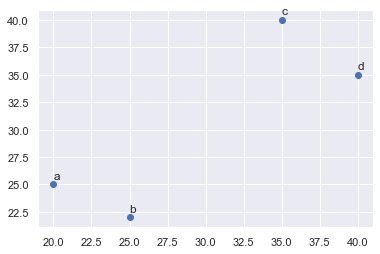

In [125]:
def plot_ploints(df):
    plt.scatter(df.math, df.science)
    for i in range(len(df)):
        y_offset = 0.5
        plt.text(df.math[i], df.science[i]+y_offset, df.index[i])
    plt.show()
    
plot_ploints(df)

### Calculate the pairwise distance
The distance between all points

In [126]:
from sklearn.metrics import pairwise_distances

In [127]:
distances = pd.DataFrame(pairwise_distances(df), columns=df.index, index=df.index)
distances

,a,b,c,d
a,0.000000,5.830952,21.213203,22.360680
b,5.830952,0.000000,20.591260,19.849433
c,21.213203,20.591260,0.000000,7.071068
d,22.360680,19.849433,7.071068,0.000000


*a* and *b* are the closest points so they become a new cluster

In [128]:
df_c1 = df.copy()
df_c1.loc['ab', :] = df_c1.loc[['a', 'b'], :].mean(axis=0)
df_c1 = df_c1.drop(['a', 'b'], axis=0)
df_c1

,math,science
c,35.0,40.0
d,40.0,35.0
ab,22.5,23.5


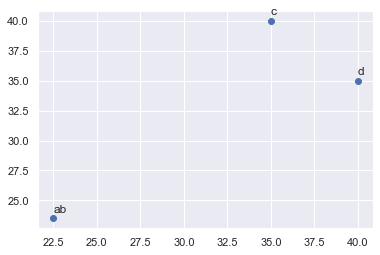

In [129]:
plot_ploints(df_c1)

In [130]:
distances1 = pd.DataFrame(pairwise_distances(df_c1), columns=df_c1.index, index=df_c1.index)
distances1

,c,d,ab
c,0.000000,7.071068,20.700242
d,7.071068,0.000000,20.940392
ab,20.700242,20.940392,0.000000


In [131]:
df_c2 = df_c1.copy()
df_c2.loc['cd', :] = df_c2.loc[['c', 'd'], :].mean(axis=0)
df_c2 = df_c2.drop(['c', 'd'], axis=0)
df_c2

,math,science
ab,22.5,23.5
cd,37.5,37.5


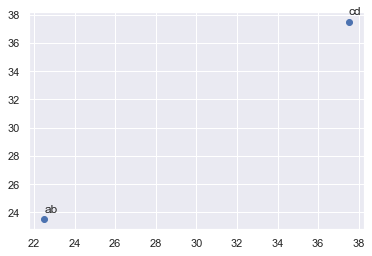

In [132]:
plot_ploints(df_c2)

## with Sklearn

In [133]:
from sklearn.cluster import AgglomerativeClustering

# used to plot the dendogram
from scipy.cluster.hierarchy import dendrogram , linkage

In [134]:
agg_clustering = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
labels = agg_clustering.fit_predict(df)

<AxesSubplot:xlabel='math', ylabel='science'>

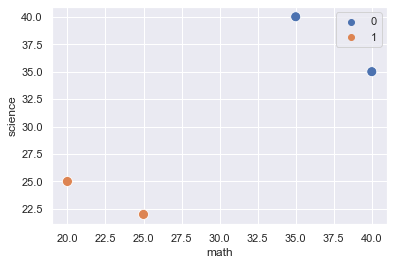

In [135]:
sns.scatterplot(x=df.math, y=df.science, hue=labels, s=100)

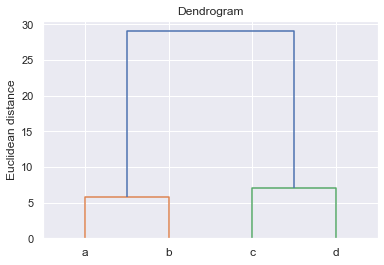

In [136]:
#Linkage Matrix
links = linkage(df, method = 'ward')
 
#plotting dendrogram
dendro = dendrogram(links, labels=df.index)
plt.title('Dendrogram')
plt.ylabel('Euclidean distance')
plt.show()

## Bigger dataset

In [137]:
from sklearn.datasets import load_iris

In [143]:
iris = load_iris()
iris_data = data.data

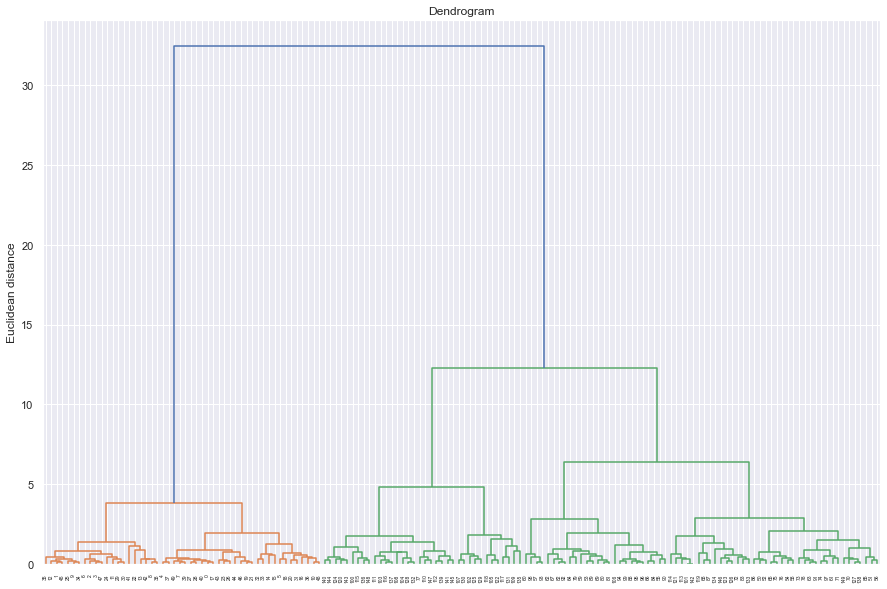

In [146]:
#Linkage Matrix
links = linkage(iris_data, method = 'ward')
 
#plotting dendrogram
plt.figure(figsize=(15,10))
dendro = dendrogram(links)
plt.title('Dendrogram')
plt.ylabel('Euclidean distance')
plt.show()

In [139]:
agg_clustering = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
labels = agg_clustering.fit_predict(iris_data)

<AxesSubplot:>

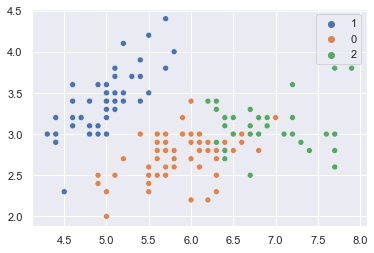

In [140]:
sns.scatterplot(x=iris_data[:, 0], y=iris_data[:, 1], hue=labels.astype(str))